In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
X_raw, y_raw = datasets.load_breast_cancer(return_X_y=True)

In [20]:
# Binary classfication problem
unique, counts = np.unique(y_raw, return_counts=True)
print(unique)
print(counts)

[0 1]
[212 357]


In [6]:
#Look at the features
X_raw.shape

(569, 30)

Coefficients: 
 [[ 1.89849124e+00  1.02653329e-01 -1.22204869e-01  1.78610917e-03
  -1.16149446e-01 -3.36515752e-01 -5.51215965e-01 -2.84675745e-01
  -1.57275916e-01 -1.45856936e-02  5.36086185e-02  1.48554230e+00
   1.62872386e-01 -9.84672337e-02 -1.40278382e-02 -3.66545980e-03
  -6.54150057e-02 -3.43958841e-02 -2.46130394e-02  3.88904106e-03
   1.72868959e+00 -3.62091957e-01 -1.15237094e-01 -2.81886580e-02
  -2.15906987e-01 -8.92204835e-01 -1.36642633e+00 -5.27043225e-01
  -4.84172120e-01 -8.75609256e-02]]
Intrecept: 
 [0.38112498]
Model Score for train set: 0.95
Model Score for test set: 0.97


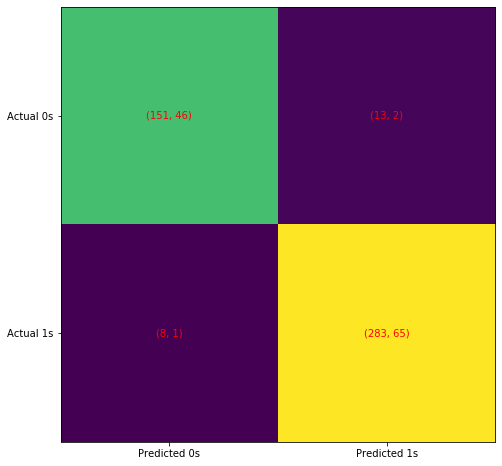

===============Train data================
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       164
           1       0.96      0.97      0.96       291

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

===============Test data================
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test \
        = train_test_split(X_raw, y_raw, test_size=0.2, random_state=5)

# Create linear regression object
model = linear_model.LogisticRegression(solver='liblinear', random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the test and train set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# The coefficients
print("Coefficients: \n", model.coef_)
#Intrecept
print("Intrecept: \n", model.intercept_)
# Accuracy of the Model
print("Model Score for train set: %.2f" % model.score(X_train, y_train))
print("Model Score for test set: %.2f" % model.score(X_test, y_test))

#Confusion Matrix
cm_train = confusion_matrix(y_train, model.predict(X_train))
cm_test = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, (cm_train[i, j], cm_test[i, j]), ha='center', va='center', color='red')
plt.show()

# Classification report for train data
print("===============Train data================")
print(classification_report(y_train, model.predict(X_train)))
# Classification report for test data
print("===============Test data================")
print(classification_report(y_test, model.predict(X_test)))

In [17]:
#Non-linear fields
X_raw_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_raw)

Coefficients: 
 [[ 8.31340089e-11  1.50737684e-10  4.91629664e-10 ... -9.67294118e-14
  -1.59660091e-14 -2.16868940e-15]]
Intrecept: 
 [9.38103669e-12]
Model Score for train set: 0.96
Model Score for test set: 0.98


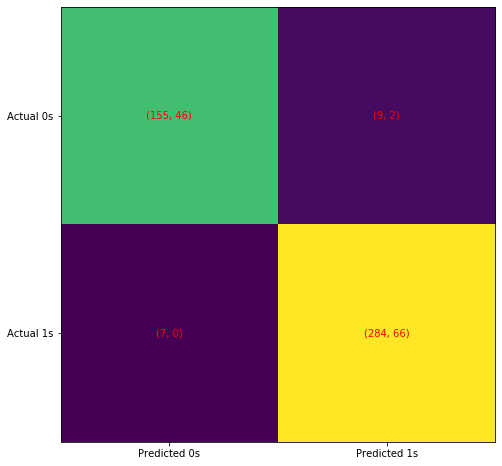

===============Train data================
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       164
           1       0.97      0.98      0.97       291

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

===============Test data================
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test \
        = train_test_split(X_raw_, y_raw, test_size=0.2, random_state=5)

# Create linear regression object
model = linear_model.LogisticRegression(solver='liblinear', random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the test and train set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# The coefficients
print("Coefficients: \n", model.coef_)
#Intrecept
print("Intrecept: \n", model.intercept_)
# Accuracy of the Model
print("Model Score for train set: %.2f" % model.score(X_train, y_train))
print("Model Score for test set: %.2f" % model.score(X_test, y_test))

#Confusion Matrix
cm_train = confusion_matrix(y_train, model.predict(X_train))
cm_test = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, (cm_train[i, j], cm_test[i, j]), ha='center', va='center', color='red')
plt.show()

# Classification report for train data
print("===============Train data================")
print(classification_report(y_train, model.predict(X_train)))
# Classification report for test data
print("===============Test data================")
print(classification_report(y_test, model.predict(X_test)))